In [1]:
# import library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Explanation of the function "crop_image_from_gray"
This function takes an image as input and crops the image to remove the black borders.

The function takes two parameters as input:
1. img: The image to be cropped
2. tol: The threshold value for the grayscale image. The default value is 7.

The function returns the cropped image.

The function first checks if the image is grayscale or RGB.
If the image is grayscale, the function creates a binary threshold mask for the grayscale image.
The mask is created by comparing the pixel values of the grayscale image with a threshold value of 7.
Pixels with values greater than 7 are assigned a value of 1,
while pixels with values less than or equal to 7 are assigned a value of 0.
The resulting binary mask is stored in a variable named "mask".

If the image is RGB, the function creates a binary threshold mask for the grayscale image.
The mask is created by converting the RGB image to grayscale and then comparing the pixel values of the grayscale image with a threshold value of 7.
Pixels with values greater than 7 are assigned a value of 1,
while pixels with values less than or equal to 7 are assigned a value of 0.
The resulting binary mask is stored in a variable named "mask".
The np.ix_ function is used to index into the image array and extract only the rows and columns where the mask has a value of 1.

The function then uses the mask to crop the image.
The function returns the cropped image.


# Explanation of the function "circle_crop_v2"
This function takes an image as input and crops the image to remove the black borders.
The function takes one parameter as input:
img: The image to be cropped

1. The function first calls the "crop_image_from_gray" function to crop the image.
2. retrieves the height, width, and depth of the image and assigns them to three separate variables.
3. calculates the largest dimension of the image (height or width) and assigns it to the variable largest_side
4. resizes the image to a square of dimensions largest_side x largest_side
5. retrieves the height, width, and depth of the resized image and assigns them to three separate variables.
6. calculates the x-coordinate and y-coordinate of the center of the image.
7. calculates the radius of the circle that can be inscribed inside the square image. The radius is assigned to the variable r.
8. creates a black image of the same dimensions as the resized input image. The black image will be used to create a circular mask.
9. draws a white circle in the center of the black image with radius r. This creates a circular mask that will be used to extract the circular region of interest (ROI) from the input image.
10. the circular mask to the input image using a bitwise AND operation. This extracts the circular ROI from the input image.
11. calls the crop_image_from_gray() function again to remove any remaining black borders from the extracted circular ROI. The final output image is assigned to the variable img.

In [2]:
def crop_image_from_gray(img,tol=7):
  if img.ndim ==2:
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]
  elif img.ndim==3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = gray_img>tol
    check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
    if (check_shape == 0):
        return img
    else:
      img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))] 
      img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
      img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
      img = np.stack([img1,img2,img3],axis=-1)
      return img

def circle_crop_v2(img):
  img = crop_image_from_gray(img)

  height, width, depth = img.shape
  largest_side = np.max((height, width))
  img = cv2.resize(img, (largest_side, largest_side))

  height, width, depth = img.shape

  x = int(width / 2)
  y = int(height / 2)
  r = np.amin((x, y))

  circle_img = np.zeros((height, width), np.uint8)
  cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
  img = cv2.bitwise_and(img, img, mask=circle_img)
  img = crop_image_from_gray(img)

  return img

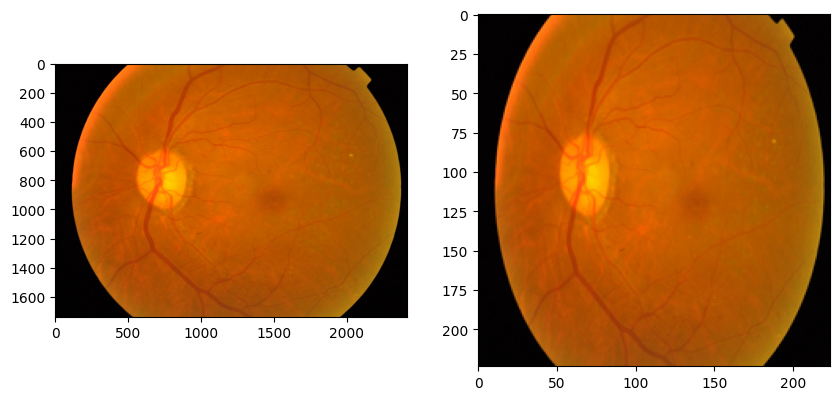

In [8]:
from PIL import Image
img_path = Image.open('E:/Pawang Code/Diabetic Retinopathy/dataset_filter/1/0a61bddab956.png')

img1 = img_path.resize((224, )*2, resample=Image.LANCZOS)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_path, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img1, cmap='gray')